In [37]:
import pandas as pd
import numpy as np

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt


In [22]:
df = pd.read_excel("../../data/interim/final.xlsx")
df.head()

,match_id,completion_date,contact_notes,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,match_length,big_birthdate,match_activation_date,little_birthdate
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...,40,Unemployed,Female,General Community,Community,Black or African American;White or Caucasian;,"Distance: 2.3 mi 9 min. Shared Traits: nice, e...",Female,Black or African American,9.0,1985-02-01,2017-03-03,2004-01-01
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...,40,Unemployed,Female,General Community,Community,Black or African American;White or Caucasian;,"Distance: 2.3 mi 9 min. Shared Traits: nice, e...",Female,Black or African American,9.0,1985-02-01,2017-03-03,2004-01-01
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...,40,Unemployed,Female,General Community,Community,Black or African American;White or Caucasian;,"Distance: 2.3 mi 9 min. Shared Traits: nice, e...",Female,Black or African American,9.0,1985-02-01,2017-03-03,2004-01-01
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...,40,Unemployed,Female,General Community,Community,Black or African American;White or Caucasian;,"Distance: 2.3 mi 9 min. Shared Traits: nice, e...",Female,Black or African American,9.0,1985-02-01,2017-03-03,2004-01-01
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...,40,Unemployed,Female,General Community,Community,Black or African American;White or Caucasian;,"Distance: 2.3 mi 9 min. Shared Traits: nice, e...",Female,Black or African American,9.0,1985-02-01,2017-03-03,2004-01-01


In [23]:
df = df.sort_values(by=["match_id", "completion_date"])
df['ndays_between_call'] = df.groupby("match_id")["completion_date"].diff().dt.days
df.fillna(0, inplace=True)
df


,match_id,completion_date,contact_notes,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,match_length,big_birthdate,match_activation_date,little_birthdate,ndays_between_call
36028,a1v2J0000027CWYQA2,2017-03-23,Question: Activities: Answer: BS ass...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,0.0
36029,a1v2J0000027CWYQA2,2017-05-11,Question: Activities: Answer: When a...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,49.0
36027,a1v2J0000027CWYQA2,2017-07-06,Question: Activities: Answer: This m...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,56.0
33345,a1v2J0000027CWfQAM,2017-02-08,Question: Activities: Answer: Sami a...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,0.0
33348,a1v2J0000027CWfQAM,2017-04-07,Question: Activities: Answer: MC ask...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29557,a1vUX000001ZICnYAO,2025-01-09,Approximately how many times has your match go...,56,Business: Marketing,Female,STEM Cohort 2025,Community,White or Caucasian;,1. Distance: 10 miles (20 mins) 2. Shared Trai...,Female,White or Caucasian,2.3,1969-01-01,2024-12-17,2012-04-01,0.0
30694,a1vUX000001agjJYAQ,2025-01-13,MEC connected with Big on 1/13 @ 4p MEC asked ...,33,Business: Marketing,Female,General Community,Community,Asian - Other;,1. Distance: 9 miles (20 mins) 2. Shared Trait...,Female,Black or African American,1.1,1991-11-01,2024-12-20,2014-05-01,0.0
31227,a1vUX000001avDhYAI,2025-01-09,MEC called BB at the scheduled time. BB expres...,48,Business: Sales,Male,General Community,Community,White or Caucasian;,Distance: 9 min (3.7 mi) Shared interests:Spor...,Male,Black or African American,2.3,1976-11-01,2024-12-17,2013-12-01,0.0
37755,a1vUX000001cplhYAA,2024-12-21,MSS: Sa'rah was very happy about her match mee...,48,Finance: Accountant,Female,BSW-Cargill,Site Based Facilitated,White or Caucasian;,They were matched for several reasons. BS has ...,Female,Black or African American,2.3,1976-06-01,2024-12-19,2014-06-01,0.0


In [24]:
cadence_summary = df.groupby("match_id")["ndays_between_call"].mean().reset_index()
cadence_summary.rename(columns={"ndays_between_call": "avg_cadence_day"}, inplace=True)
df = pd.merge(df, cadence_summary, on="match_id", how="left")
df


,match_id,completion_date,contact_notes,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,match_length,big_birthdate,match_activation_date,little_birthdate,ndays_between_call,avg_cadence_day
0,a1v2J0000027CWYQA2,2017-03-23,Question: Activities: Answer: BS ass...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,0.0,35.0
1,a1v2J0000027CWYQA2,2017-05-11,Question: Activities: Answer: When a...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,49.0,35.0
2,a1v2J0000027CWYQA2,2017-07-06,Question: Activities: Answer: This m...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,56.0,35.0
3,a1v2J0000027CWfQAM,2017-02-08,Question: Activities: Answer: Sami a...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,0.0,46.2
4,a1v2J0000027CWfQAM,2017-04-07,Question: Activities: Answer: MC ask...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,58.0,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37762,a1vUX000001ZICnYAO,2025-01-09,Approximately how many times has your match go...,56,Business: Marketing,Female,STEM Cohort 2025,Community,White or Caucasian;,1. Distance: 10 miles (20 mins) 2. Shared Trai...,Female,White or Caucasian,2.3,1969-01-01,2024-12-17,2012-04-01,0.0,0.0
37763,a1vUX000001agjJYAQ,2025-01-13,MEC connected with Big on 1/13 @ 4p MEC asked ...,33,Business: Marketing,Female,General Community,Community,Asian - Other;,1. Distance: 9 miles (20 mins) 2. Shared Trait...,Female,Black or African American,1.1,1991-11-01,2024-12-20,2014-05-01,0.0,0.0
37764,a1vUX000001avDhYAI,2025-01-09,MEC called BB at the scheduled time. BB expres...,48,Business: Sales,Male,General Community,Community,White or Caucasian;,Distance: 9 min (3.7 mi) Shared interests:Spor...,Male,Black or African American,2.3,1976-11-01,2024-12-17,2013-12-01,0.0,0.0
37765,a1vUX000001cplhYAA,2024-12-21,MSS: Sa'rah was very happy about her match mee...,48,Finance: Accountant,Female,BSW-Cargill,Site Based Facilitated,White or Caucasian;,They were matched for several reasons. BS has ...,Female,Black or African American,2.3,1976-06-01,2024-12-19,2014-06-01,0.0,29.5


In [25]:
correlation = df["avg_cadence_day"].corr(df["match_length"])
print("Correlation:", correlation)


Correlation: 0.7488531105247068


In [26]:


# Function to split early and late stage call notes
def split_call_notes(match_df):
    num_calls = len(match_df)
    
    # Edge case: no calls or only one call
    if num_calls == 0:
        return pd.Series(["unavailable", "unavailable"], index=["early_stage_notes", "late_stage_notes"])
    
    elif num_calls == 1:
        return pd.Series([match_df["contact_notes"].iloc[0], "unavailable"],index=["early_stage_notes", "late_stage_notes"])
    
    # Split the match calls into early and late stages based on call count
    early_stage = match_df.head(num_calls // 2)["contact_notes"].str.cat(sep=" ")  # First 50% of the calls
    late_stage = match_df.tail(num_calls - (num_calls // 2))["contact_notes"].str.cat(sep=" ")  # Remaining calls
    
    return pd.Series([early_stage, late_stage], index=["early_stage_notes", "late_stage_notes"])

# Apply the function for each match and concatenate
df_grouped = df.groupby("match_id").apply(split_call_notes).reset_index()

# Merge back with the original dataframe
df_final = pd.merge(df, df_grouped, on="match_id", how="left")

# Display the results
df_final

/tmp/ipykernel_2785/2212531346.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby("match_id").apply(split_call_notes).reset_index()


,match_id,completion_date,contact_notes,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,match_length,big_birthdate,match_activation_date,little_birthdate,ndays_between_call,avg_cadence_day,early_stage_notes,late_stage_notes
0,a1v2J0000027CWYQA2,2017-03-23,Question: Activities: Answer: BS ass...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,0.0,35.0,Question: Activities: Answer: BS ass...,Question: Activities: Answer: When a...
1,a1v2J0000027CWYQA2,2017-05-11,Question: Activities: Answer: When a...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,49.0,35.0,Question: Activities: Answer: BS ass...,Question: Activities: Answer: When a...
2,a1v2J0000027CWYQA2,2017-07-06,Question: Activities: Answer: This m...,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,56.0,35.0,Question: Activities: Answer: BS ass...,Question: Activities: Answer: When a...
3,a1v2J0000027CWfQAM,2017-02-08,Question: Activities: Answer: Sami a...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,0.0,46.2,Question: Activities: Answer: Sami a...,Question: Activities: Answer: L_firs...
4,a1v2J0000027CWfQAM,2017-04-07,Question: Activities: Answer: MC ask...,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,58.0,46.2,Question: Activities: Answer: Sami a...,Question: Activities: Answer: L_firs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37762,a1vUX000001ZICnYAO,2025-01-09,Approximately how many times has your match go...,56,Business: Marketing,Female,STEM Cohort 2025,Community,White or Caucasian;,1. Distance: 10 miles (20 mins) 2. Shared Trai...,Female,White or Caucasian,2.3,1969-01-01,2024-12-17,2012-04-01,0.0,0.0,Approximately how many times has your match go...,unavailable
37763,a1vUX000001agjJYAQ,2025-01-13,MEC connected with Big on 1/13 @ 4p MEC asked ...,33,Business: Marketing,Female,General Community,Community,Asian - Other;,1. Distance: 9 miles (20 mins) 2. Shared Trait...,Female,Black or African American,1.1,1991-11-01,2024-12-20,2014-05-01,0.0,0.0,MEC connected with Big on 1/13 @ 4p MEC asked ...,unavailable
37764,a1vUX000001avDhYAI,2025-01-09,MEC called BB at the scheduled time. BB expres...,48,Business: Sales,Male,General Community,Community,White or Caucasian;,Distance: 9 min (3.7 mi) Shared interests:Spor...,Male,Black or African American,2.3,1976-11-01,2024-12-17,2013-12-01,0.0,0.0,MEC called BB at the scheduled time. BB expres...,unavailable
37765,a1vUX000001cplhYAA,2024-12-21,MSS: Sa'rah was very happy about her match mee...,48,Finance: Accountant,Female,BSW-Cargill,Site Based Facilitated,White or Caucasian;,They were matched for several reasons. BS has ...,Female,Black or African American,2.3,1976-06-01,2024-12-19,2014-06-01,0.0,29.5,MSS: Sa'rah was very happy about her match mee...,MSS: Hi BS! Thank you so much for making the t...


In [27]:
data = df_final.drop(['completion_date', 'contact_notes', "ndays_between_call"], axis=1).groupby("match_id").first()
data

,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,match_length,big_birthdate,match_activation_date,little_birthdate,avg_cadence_day,early_stage_notes,late_stage_notes
match_id,,,,,,,,,,,,,,,,
a1v2J0000027CWYQA2,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,5.5,1999-10-01,2017-03-16,2005-10-01,35.000000,Question: Activities: Answer: BS ass...,Question: Activities: Answer: When a...
a1v2J0000027CWfQAM,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,8.5,1998-06-01,2017-01-23,2006-08-01,46.200000,Question: Activities: Answer: Sami a...,Question: Activities: Answer: L_firs...
a1v2J0000027CWiQAM,27,Student: High School,Female,YIP 2016,Site,Asian;,Both BS and LB share similar interests. BS has...,Female,Asian,6.9,1998-02-01,2017-02-01,2005-10-01,35.333333,Question: Activities: Answer: BS has...,Question: Activities: Answer: BS sai...
a1v2J0000027CWoQAM,25,Student: High School,Female,YIP 2016,Site,Asian;,B_first_name was open to the little that he is...,Female,Asian,7.2,1999-11-01,2017-03-16,2009-04-01,43.750000,Question: Activities: Answer: BS pla...,Question: Activities: Answer: This m...
a1v2J0000027CWpQAM,27,Student: College,Male,YIP 2016,Site,White or Caucasian;,Distance is 8 miles (21 mins). Both are talkti...,Male,Black or African American,7.4,1997-09-01,2017-01-26,2006-11-01,45.750000,Question: Activities: Answer: B_firs...,Question: Activities: Answer: B_firs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a1vUX000001ZI7xYAG,38,Medical: Nurse,Female,STEM Cohort 2025,Community,White or Caucasian;,Distance: 13 min (4.6 mi) Shared Interests: sp...,Female,Black or African American,2.4,1987-02-01,2024-12-16,2011-08-01,11.666667,You 4:56 PM Hi B_first_name! This is Kelley Ne...,Approximately how many times has your match go...
a1vUX000001ZICnYAO,56,Business: Marketing,Female,STEM Cohort 2025,Community,White or Caucasian;,1. Distance: 10 miles (20 mins) 2. Shared Trai...,Female,White or Caucasian,2.3,1969-01-01,2024-12-17,2012-04-01,0.000000,Approximately how many times has your match go...,unavailable
a1vUX000001agjJYAQ,33,Business: Marketing,Female,General Community,Community,Asian - Other;,1. Distance: 9 miles (20 mins) 2. Shared Trait...,Female,Black or African American,1.1,1991-11-01,2024-12-20,2014-05-01,0.000000,MEC connected with Big on 1/13 @ 4p MEC asked ...,unavailable


In [28]:
# data.to_excel("../../data/interim/cleaned.xlsx", index=False)

In [29]:
# Download VADER Lexicon (if not already downloaded)
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/amen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Function to compute sentiment score
def get_sentiment(text):
    if text == "unavailable":  # Handle missing data
        return 0.0
    return sia.polarity_scores(text)["compound"]

# Compute sentiment scores for early and late stages
data["early_stage_score"] = data["early_stage_notes"].apply(get_sentiment)
data["late_stage_score"] = data["late_stage_notes"].apply(get_sentiment)



In [34]:
data.reset_index(inplace=True)

In [35]:
# Compute sentiment change
data["sentiment_change"] = data["late_stage_score"] - data["early_stage_score"]
data["sentiment_change"] 

0       0.2255
1      -0.0074
2       0.0281
3      -0.5276
4      -0.0170
         ...  
3259    0.0000
3260   -0.9942
3261   -0.9977
3262   -0.9652
3263    0.0014
Name: sentiment_change, Length: 3264, dtype: float64

In [36]:

# Categorize sentiment trend
def categorize_change(change):
    if change > 0.5:
        return "Improved"
    elif change < -0.5:
        return "Declined"
    else:
        return "Stable"

data["sentiment_trend"] = data["sentiment_change"].apply(categorize_change)
data["sentiment_trend"]


0         Stable
1         Stable
2         Stable
3       Declined
4         Stable
          ...   
3259      Stable
3260    Declined
3261    Declined
3262    Declined
3263      Stable
Name: sentiment_trend, Length: 3264, dtype: object

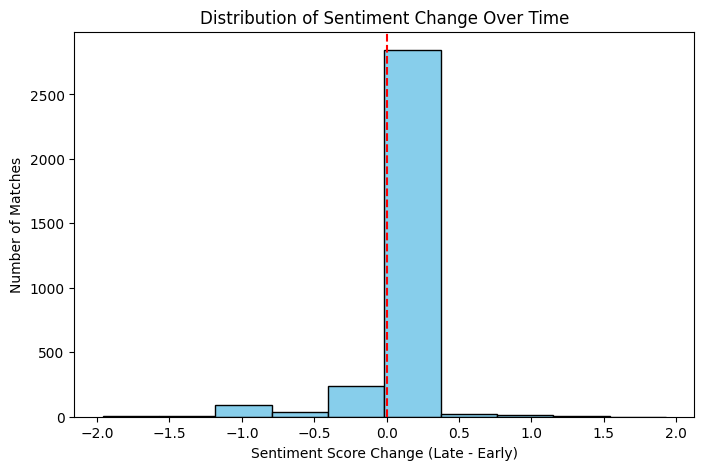

In [38]:
#  Plot sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(data["sentiment_change"], bins=10, color="skyblue", edgecolor="black")
plt.axvline(0, color='red', linestyle="dashed")  # Vertical line at 0
plt.xlabel("Sentiment Score Change (Late - Early)")
plt.ylabel("Number of Matches")
plt.title("Distribution of Sentiment Change Over Time")
plt.show()


In [40]:
trend_counts = data["sentiment_trend"].value_counts()
trend_counts

sentiment_trend
Stable      3104
Declined     135
Improved      25
Name: count, dtype: int64

In [41]:
data.to_csv("../../data/interim/cleaned_v2.csv", index=False)